In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\singh\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [51]:
import pandas as pd

In [52]:
# working with movies_metadata.csv
books = pd.read_csv(f"{path}/books.csv")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [4]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [5]:
isbn = books['isbn13'].unique()
isbn

array([9780002005883, 9780002261982, 9780006163831, ..., 9788445074879,
       9789027712059, 9789042003408], shape=(6810,))

In [53]:
books['isbn13'].nunique()

6810

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

TypeError: 'str' object is not callable

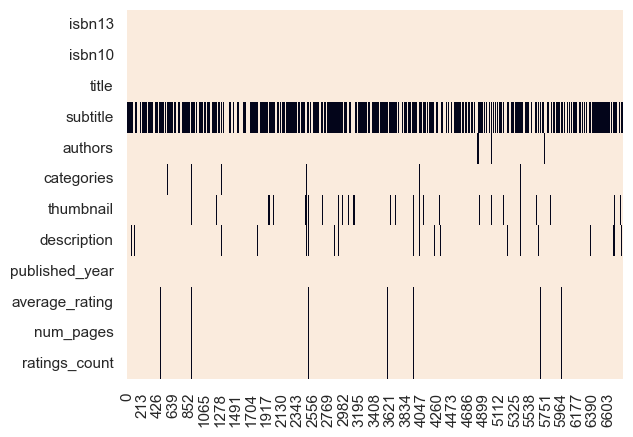

In [64]:
sns.heatmap(~books.isna().transpose(), cbar=False)
plt.xlabel('Colums')
plt.ylabel('MissingValues')
plt.show()

In [66]:
import numpy as np
books['MissingDescription'] = np.where(books['description'].isna(),1,0)
books['ageOfBooks'] = 2025 - books['published_year']

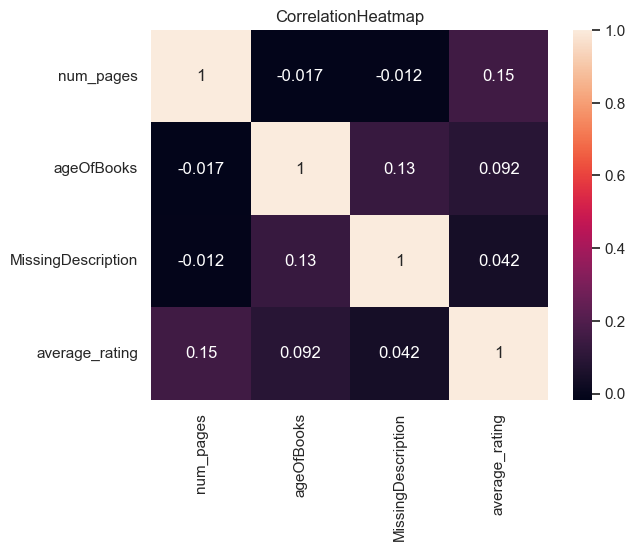

In [ ]:
columsOfInterest = ['num_pages', 'ageOfBooks', 'MissingDescription', 'average_rating']
correlationMatrix = books[columsOfInterest].corr(method= "spearman")

sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlationMatrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={"label": "SpearmanCorrelation"})
heatmap.set_title("CorrelationHeatmap")
plt.show()

In [71]:
# masking
missingBooks = (books['description'].isna() |
    books['num_pages'].isna() |
    books['average_rating'].isna() |
    books['published_year'].isna())
missingBooks

0       False
1       False
2       False
3       False
4       False
        ...  
6805    False
6806     True
6807     True
6808    False
6809    False
Length: 6810, dtype: bool

In [72]:
cleanedBooks=books[~missingBooks]
cleanedBooks

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,MissingDescription,ageOfBooks
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


                       categories  count
0                         Fiction   2523
1                Juvenile Fiction    534
2       Biography & Autobiography    391
3                         History    258
4              Literary Criticism    164
..                            ...    ...
526                       Courage      1
527   Otherland (Imaginary place)      1
528                       Animals      1
529  Children of divorced parents      1
530                Catholic women      1

[531 rows x 2 columns]


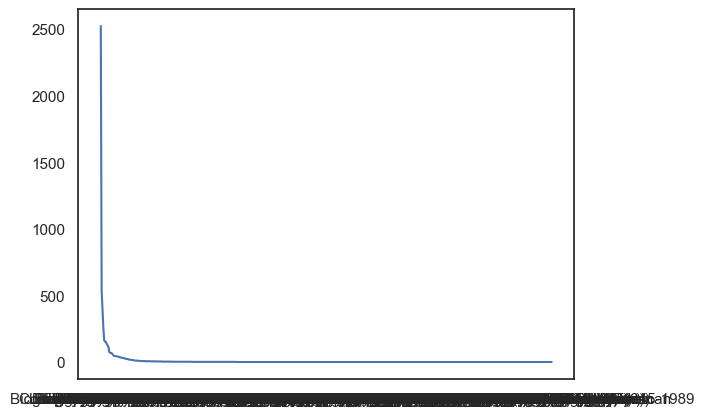

In [91]:
categoriesCount= cleanedBooks['categories'].value_counts().reset_index().sort_values('count', ascending=False)
print(categoriesCount)
# sns.(categoriesCount, cbar=False)
plt.xlabel= 'counts'
plt.ylabel= 'categories'
plt.plot(categoriesCount['categories'],categoriesCount['count'])

             isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
2     9780006163831  0006163831   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
...             ...         ...   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   
6809  9789042003408  9042003405   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
2                                          The One Tree   
3                                        Rage of angels   
4                                        The Four Loves   
...                                                 ...   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I 

C:\Users\singh\AppData\Local\Temp\ipykernel_13460\245408329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedBooks['discriptionWords'] = cleanedBooks['description'].str.split().str.len()


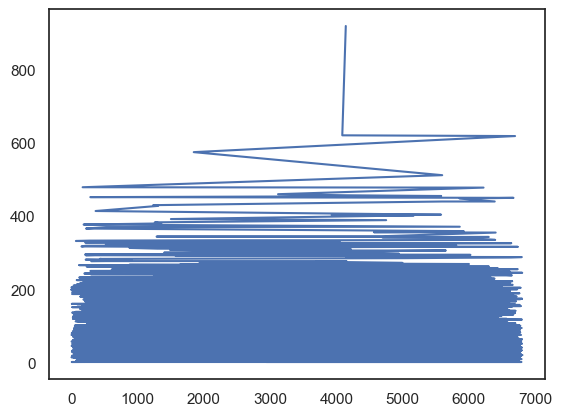

In [101]:
cleanedBooks['discriptionWords'] = cleanedBooks['description'].str.split().str.len()
print(cleanedBooks)
plt.xlabel='discriptionWords'
plt.plot(cleanedBooks['discriptionWords'].sort_values(ascending=False))

In [102]:
cleanedBooks.loc[cleanedBooks['discriptionWords'].between(25,34),'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [109]:
booksWithDescription = cleanedBooks[cleanedBooks['discriptionWords']>=25]
booksWithDescription

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,MissingDescription,ageOfBooks,discriptionWords
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [110]:
booksWithDescription['titleAndSubtitle'] = (np.where(booksWithDescription['subtitle'].isna(),booksWithDescription['title'],
                                            booksWithDescription[['title','subtitle']].astype('str').agg(": ".join, axis=1)))
booksWithDescription['titleAndSubtitle']

C:\Users\singh\AppData\Local\Temp\ipykernel_13460\542230144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booksWithDescription['titleAndSubtitle'] = (np.where(booksWithDescription['subtitle'].isna(),booksWithDescription['title'],


0                                                  Gilead
1                                   Spider's Web: A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6802                                    Mistaken Identity
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805       I Am that: Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
Name: titleAndSubtitle, Length: 5197, dtype: object

In [111]:
booksWithDescription['tagged_description']= booksWithDescription[['isbn13','description']].astype('str').agg(" ".join, axis=1)
booksWithDescription['tagged_description']

C:\Users\singh\AppData\Local\Temp\ipykernel_13460\1997800113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booksWithDescription['tagged_description']= booksWithDescription[['isbn13','description']].astype('str').agg(" ".join, axis=1)


0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6802    9788172235222 On A Train Journey Home To North...
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [112]:
booksWithDescription

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,MissingDescription,ageOfBooks,discriptionWords,titleAndSubtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [113]:
(
    booksWithDescription.drop(['subtitle','description','ageOfBooks','discriptionWords'],axis=1)
    .to_csv("booksCleaned.csv",index=False)
)